In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autogear-switching-b1-fat/sample_submission_file.csv
/kaggle/input/autogear-switching-b1-fat/train.csv
/kaggle/input/autogear-switching-b1-fat/test.csv


# Inputting Train and Test Data

In [2]:
train_data=pd.read_csv('/kaggle/input/autogear-switching-b1-fat/train.csv')
test_data=pd.read_csv('/kaggle/input/autogear-switching-b1-fat/test.csv')

In [3]:
train_data.head()

,ID,Target,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,...,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,1,-1.585,Medium,0.602,-3.307,0.170,-0.187,0.896,0.977,...,Cat1,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534,2.477
1,2,1,2.573,Medium,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,...,Cat2,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492,-0.700
2,3,0,0.106,Medium,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,...,Cat1,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859,1.581
3,4,0,-1.997,High,-1.203,1.347,0.588,0.372,1.846,-0.986,...,Cat1,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738,-2.621
4,5,1,-1.900,Medium,0.571,-1.348,1.335,0.000,-1.125,2.419,...,Cat2,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187,-2.589


In [4]:
train_data.columns

Index(['ID', 'Target', 'feature-1', 'feature-2', 'feature-3', 'feature-4',
       'feature-5', 'feature-6', 'feature-7', 'feature-8', 'feature-9',
       'feature-10', 'feature-11', 'feature-12', 'feature-13', 'feature-14',
       'feature-15', 'feature-16', 'feature-17', 'feature-18', 'feature-19',
       'feature-20'],
      dtype='object')

# Checking for non-numeric features in the data.

In [5]:
non_numeric_columns = train_data.select_dtypes(exclude=['number']).columns
non_numeric_columns

Index(['feature-2', 'feature-11'], dtype='object')

# Using LabelEncoder() to encode the non-numeric values to numeric values

In [6]:
cols = ['feature-2', 'feature-11']
train_data[cols] = train_data[cols].apply(LabelEncoder().fit_transform)
colst=['feature-2', 'feature-11']
test_data[colst] = test_data[colst].apply(LabelEncoder().fit_transform)

In [7]:
train_data

,ID,Target,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,...,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,1,-1.585,2,0.602,-3.307,0.170,-0.187,0.896,0.977,...,0,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534,2.477
1,2,1,2.573,2,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,...,1,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492,-0.700
2,3,0,0.106,2,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,...,0,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859,1.581
3,4,0,-1.997,0,-1.203,1.347,0.588,0.372,1.846,-0.986,...,0,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738,-2.621
4,5,1,-1.900,2,0.571,-1.348,1.335,0.000,-1.125,2.419,...,1,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187,-2.589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2,0.656,2,0.345,-1.581,0.006,-0.451,-0.637,-0.318,...,0,0.206,-0.581,1.681,-0.807,-0.525,0.610,2.467,0.959,-0.807
11996,11997,2,2.508,2,0.278,3.260,-0.935,-0.203,1.357,-0.822,...,1,0.615,0.878,0.036,-0.308,-0.295,-1.762,0.294,1.411,-0.308
11997,11998,2,1.817,1,0.290,1.779,-0.160,-0.524,0.646,3.395,...,1,-0.332,5.748,0.883,3.225,-0.147,-1.289,-3.056,1.387,3.225
11998,11999,1,2.115,2,0.665,0.751,0.838,0.596,1.655,1.893,...,1,1.915,-0.421,-0.660,-2.685,-1.231,0.464,1.780,-0.157,-2.685


In [8]:
test_data

,ID,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,0.965,2,-0.489,-0.031,-1.881,-0.127,-0.545,-1.110,-1.015,...,0,0.678,-0.073,0.035,1.213,-0.029,0.868,0.577,1.553,1.213
1,2,0.164,2,1.621,-0.757,-0.694,0.167,0.436,1.117,-0.159,...,0,0.192,-0.499,-1.133,-0.980,-0.721,0.355,-0.437,0.448,-0.980
2,3,0.331,2,0.881,-1.797,0.721,-0.227,0.122,-0.102,-0.174,...,0,-0.393,-0.540,3.488,2.723,0.596,-2.512,1.505,-1.169,2.723
3,4,0.164,2,1.719,1.305,1.320,0.418,0.003,-3.648,-1.009,...,0,-0.674,-0.126,1.110,-2.813,-1.182,0.248,2.002,-0.641,-2.813
4,5,-1.367,2,-0.422,-0.490,0.227,-0.129,-1.175,-0.185,-2.062,...,0,-0.213,-1.171,1.631,1.671,-1.306,-0.124,1.512,0.451,1.671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.020,2,1.520,0.773,0.142,0.518,1.312,-0.776,0.042,...,1,-1.707,0.977,0.782,-1.244,-1.441,-1.794,-0.565,0.791,-1.244
2996,2997,2.095,2,1.080,0.424,-2.596,2.138,0.378,-1.533,-0.439,...,0,1.892,-1.694,-3.272,-0.219,-0.504,0.549,-1.182,1.088,-0.219
2997,2998,5.322,2,0.718,0.550,-2.167,-0.705,-0.331,-1.006,1.343,...,1,0.784,1.209,2.079,-1.955,-0.196,-1.662,2.783,-1.234,-1.955
2998,2999,5.293,2,-0.320,0.224,-1.805,-0.865,1.208,-0.770,2.140,...,1,0.448,2.567,1.905,-3.389,1.153,-0.219,2.695,1.134,-3.389


# Checking for any NaN values in the Dataset

In [9]:
nan_counts = train_data.isnull().sum()
print(nan_counts)

ID            0
Target        0
feature-1     0
feature-2     0
feature-3     0
feature-4     0
feature-5     0
feature-6     0
feature-7     0
feature-8     0
feature-9     0
feature-10    0
feature-11    0
feature-12    0
feature-13    0
feature-14    0
feature-15    0
feature-16    0
feature-17    0
feature-18    0
feature-19    0
feature-20    0
dtype: int64


# Dropping NaN values and Duplicate Values

In [10]:
train_data = train_data.drop_duplicates()
train_data = train_data.dropna()

In [11]:
train_data

,ID,Target,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,...,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,1,-1.585,2,0.602,-3.307,0.170,-0.187,0.896,0.977,...,0,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534,2.477
1,2,1,2.573,2,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,...,1,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492,-0.700
2,3,0,0.106,2,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,...,0,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859,1.581
3,4,0,-1.997,0,-1.203,1.347,0.588,0.372,1.846,-0.986,...,0,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738,-2.621
4,5,1,-1.900,2,0.571,-1.348,1.335,0.000,-1.125,2.419,...,1,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187,-2.589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2,0.656,2,0.345,-1.581,0.006,-0.451,-0.637,-0.318,...,0,0.206,-0.581,1.681,-0.807,-0.525,0.610,2.467,0.959,-0.807
11996,11997,2,2.508,2,0.278,3.260,-0.935,-0.203,1.357,-0.822,...,1,0.615,0.878,0.036,-0.308,-0.295,-1.762,0.294,1.411,-0.308
11997,11998,2,1.817,1,0.290,1.779,-0.160,-0.524,0.646,3.395,...,1,-0.332,5.748,0.883,3.225,-0.147,-1.289,-3.056,1.387,3.225
11998,11999,1,2.115,2,0.665,0.751,0.838,0.596,1.655,1.893,...,1,1.915,-0.421,-0.660,-2.685,-1.231,0.464,1.780,-0.157,-2.685


In [12]:
test_data

,ID,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,0.965,2,-0.489,-0.031,-1.881,-0.127,-0.545,-1.110,-1.015,...,0,0.678,-0.073,0.035,1.213,-0.029,0.868,0.577,1.553,1.213
1,2,0.164,2,1.621,-0.757,-0.694,0.167,0.436,1.117,-0.159,...,0,0.192,-0.499,-1.133,-0.980,-0.721,0.355,-0.437,0.448,-0.980
2,3,0.331,2,0.881,-1.797,0.721,-0.227,0.122,-0.102,-0.174,...,0,-0.393,-0.540,3.488,2.723,0.596,-2.512,1.505,-1.169,2.723
3,4,0.164,2,1.719,1.305,1.320,0.418,0.003,-3.648,-1.009,...,0,-0.674,-0.126,1.110,-2.813,-1.182,0.248,2.002,-0.641,-2.813
4,5,-1.367,2,-0.422,-0.490,0.227,-0.129,-1.175,-0.185,-2.062,...,0,-0.213,-1.171,1.631,1.671,-1.306,-0.124,1.512,0.451,1.671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.020,2,1.520,0.773,0.142,0.518,1.312,-0.776,0.042,...,1,-1.707,0.977,0.782,-1.244,-1.441,-1.794,-0.565,0.791,-1.244
2996,2997,2.095,2,1.080,0.424,-2.596,2.138,0.378,-1.533,-0.439,...,0,1.892,-1.694,-3.272,-0.219,-0.504,0.549,-1.182,1.088,-0.219
2997,2998,5.322,2,0.718,0.550,-2.167,-0.705,-0.331,-1.006,1.343,...,1,0.784,1.209,2.079,-1.955,-0.196,-1.662,2.783,-1.234,-1.955
2998,2999,5.293,2,-0.320,0.224,-1.805,-0.865,1.208,-0.770,2.140,...,1,0.448,2.567,1.905,-3.389,1.153,-0.219,2.695,1.134,-3.389


# Box-Plot

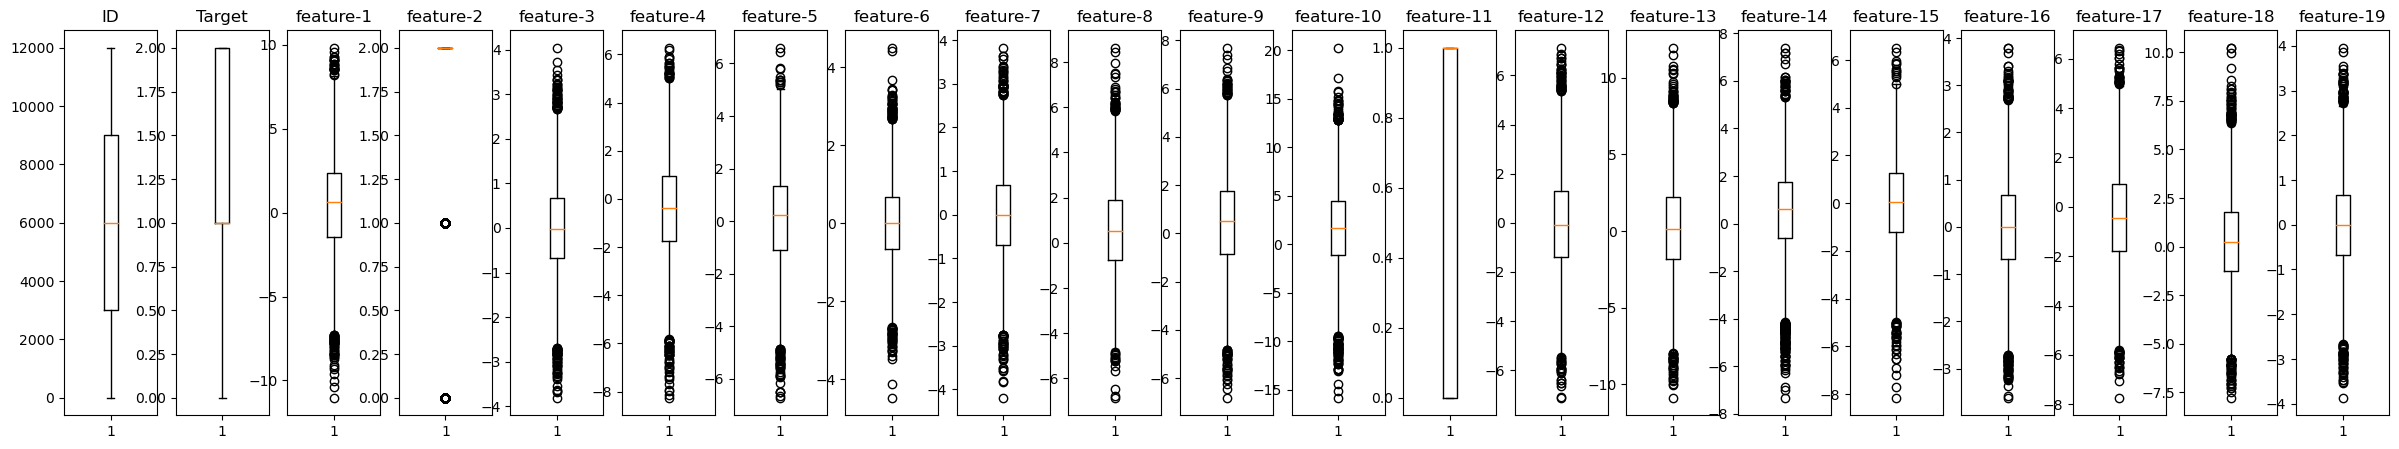

In [38]:
fig, axs = plt.subplots(ncols=21, figsize=(30, 5))
for i, col in enumerate(train_data.columns[:-1]):
    axs[i].boxplot(train_data[col])
    axs[i].set_title(col)
plt.show()

# Splitting Training features and Target Variable

In [13]:
X = train_data.iloc[:, 2:22]  
y = train_data['Target']  
x= test_data.iloc[:,1:]

In [14]:
X

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,-1.585,2,0.602,-3.307,0.170,-0.187,0.896,0.977,-1.203,5.207,0,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534,2.477
1,2.573,2,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,0.896,0.441,1,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492,-0.700
2,0.106,2,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,-0.883,-0.917,0,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859,1.581
3,-1.997,0,-1.203,1.347,0.588,0.372,1.846,-0.986,-1.897,-3.308,0,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738,-2.621
4,-1.900,2,0.571,-1.348,1.335,0.000,-1.125,2.419,0.524,2.222,1,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187,-2.589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.656,2,0.345,-1.581,0.006,-0.451,-0.637,-0.318,-0.950,1.290,0,0.206,-0.581,1.681,-0.807,-0.525,0.610,2.467,0.959,-0.807
11996,2.508,2,0.278,3.260,-0.935,-0.203,1.357,-0.822,1.301,-0.240,1,0.615,0.878,0.036,-0.308,-0.295,-1.762,0.294,1.411,-0.308
11997,1.817,1,0.290,1.779,-0.160,-0.524,0.646,3.395,5.927,6.112,1,-0.332,5.748,0.883,3.225,-0.147,-1.289,-3.056,1.387,3.225
11998,2.115,2,0.665,0.751,0.838,0.596,1.655,1.893,2.041,1.040,1,1.915,-0.421,-0.660,-2.685,-1.231,0.464,1.780,-0.157,-2.685


# Creating a Correlation Heatmap

<Axes: >

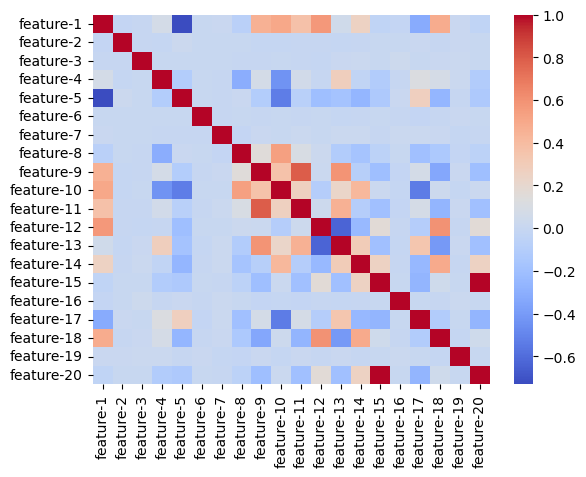

In [15]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

***WE Observe that Feature 15 & Feature 20 are highly correlated***

In [22]:
X=train_data.iloc[:, 2:21]
x=test_data.iloc[:,1:20]

In [20]:
X.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19
0,-1.585,2,0.602,-3.307,0.170,-0.187,0.896,0.977,-1.203,5.207,0,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534
1,2.573,2,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,0.896,0.441,1,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492
2,0.106,2,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,-0.883,-0.917,0,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859
3,-1.997,0,-1.203,1.347,0.588,0.372,1.846,-0.986,-1.897,-3.308,0,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738
4,-1.900,2,0.571,-1.348,1.335,0.000,-1.125,2.419,0.524,2.222,1,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187


In [23]:
x.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19
0,0.965,2,-0.489,-0.031,-1.881,-0.127,-0.545,-1.110,-1.015,-0.827,0,0.678,-0.073,0.035,1.213,-0.029,0.868,0.577,1.553
1,0.164,2,1.621,-0.757,-0.694,0.167,0.436,1.117,-0.159,1.261,0,0.192,-0.499,-1.133,-0.980,-0.721,0.355,-0.437,0.448
2,0.331,2,0.881,-1.797,0.721,-0.227,0.122,-0.102,-0.174,3.834,0,-0.393,-0.540,3.488,2.723,0.596,-2.512,1.505,-1.169
3,0.164,2,1.719,1.305,1.320,0.418,0.003,-3.648,-1.009,-4.228,0,-0.674,-0.126,1.110,-2.813,-1.182,0.248,2.002,-0.641
4,-1.367,2,-0.422,-0.490,0.227,-0.129,-1.175,-0.185,-2.062,-0.573,0,-0.213,-1.171,1.631,1.671,-1.306,-0.124,1.512,0.451


# Normalizing The Data

In [24]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(x)

In [25]:
y

0        1
1        1
2        0
3        0
4        1
        ..
11995    2
11996    2
11997    2
11998    1
11999    1
Name: Target, Length: 12000, dtype: int64

# Creating the RandomForestClassifier (0.91150)

In [30]:
rf_model = RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=5)
rf_model.fit(X_scaled,y)
y_pred=rf_model.predict(X_test_scaled)
print(cross_val_score(rf_model, X_scaled, y, cv=5))

[0.9175     0.91833333 0.90666667 0.9225     0.90666667]


***We can observe that the difference between the cross_val_score is very less. Hence Conclusing that our model doesn't overfit or underfit.***

# Creating the GradientBoostingClassifier (0.87300)

In [32]:
gb_model = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,max_depth=5)
gb_model.fit(X_scaled,y)
y_pred=gb_model.predict(X_test_scaled)
print(cross_val_score(gb_model, X_scaled, y, cv=5))

[0.88333333 0.88416667 0.88125    0.88416667 0.88083333]


***We can observe that the difference between the cross_val_score is very less. Hence Conclusing that our model doesn't overfit or underfit.***

# Creating the StackingClassifier (0.92250)

In [44]:
estimators = [
    ('lr', LogisticRegression(C=0.1, solver='liblinear')),
    ('dt', DecisionTreeClassifier(max_depth=10, min_samples_split=5)),
    ('rf', RandomForestClassifier(n_estimators=400,max_depth=20,min_samples_split=5))
]
meta_model = RandomForestClassifier(n_estimators=400,max_depth=20,min_samples_split=5)
model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model
)
model.fit(X_scaled,y)
y_pred=model.predict(X_test_scaled)
print(cross_val_score(model, X_scaled, y, cv=5))

[0.92833333 0.92541667 0.9225     0.93041667 0.92416667]


***We can observe that the difference between the cross_val_score is very less. Hence Conclusing that our model doesn't overfit or underfit.***

# Creating Submission File!

In [46]:
submission = pd.DataFrame({"ID": test_data["ID"], "Target": y_pred})
submission.to_csv("submission.csv", index=False)